In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [31]:
iris = datasets.load_iris()

In [29]:
#Perform PCA on iris data
X_std = StandardScaler().fit_transform(iris.data)
y = iris.target

pca = PCA(n_components = 2)

yPCA = pca.fit_transform(X_std)

In [10]:
#Define nearest neighbor function
def knn(data, len_label, wid_label, f_type, pt):
    #Function Input:
    #data = DataFrame of length, width and categorical data
    #len_label = String defining length data column
    #wid_label = String defining width data column
    #f_type = String defining categorical data column
    
    #Select random point and extract data
    len_point = data[len_label].loc[pt]
    wid_point = data[wid_label].loc[pt]
    
    nearest = pd.DataFrame(columns = ['distance', 'f_type'])
    nearest['distance'] = pow( 
                              pow(data[len_label] - len_point, 2) 
                            + pow(data[wid_label] - wid_point, 2)
                            , 0.5)
    nearest['f_type'] = data[f_type]
    
    nearest = nearest.sort_values(by = ['distance'])
    nearest = nearest.reset_index(drop = True)
    
    max_counts = (nearest['f_type'][1:11]).value_counts().max()
    counts = (nearest['f_type'][1:11]).value_counts()
    count = counts[counts == max_counts].index
    
    return(nearest, pt, count[0])

In [26]:
#Process the PCA decomposed data through knn
decomp_data = pd.DataFrame(data = yPCA, columns = ['sepal_len', 'sepal_wid'])
decomp_data['f_type'] = y

mclass = []
for i in range(len(decomp_data)):
    nearest, pt, count = knn(decomp_data,'sepal_len','sepal_wid','f_type',i)
    mclass.append(count)

decomp_data['kNN_type'] = mclass

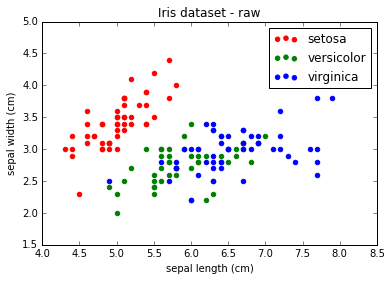

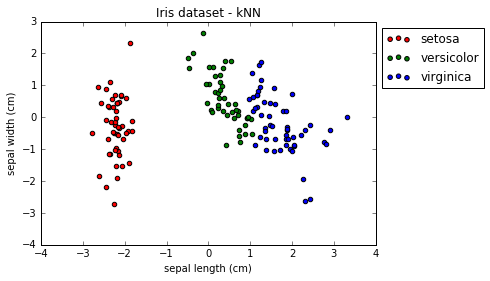

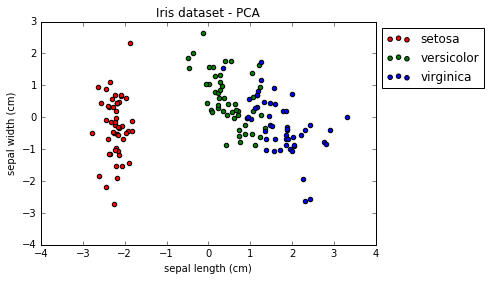

In [30]:
#Plot the raw, kNN and PCA results
cmap = ['red', 'green', 'blue']

plt.figure()
for i, name in enumerate(iris.target_names):
    X = iris.data[iris.target == i]

    plt.scatter(X[:, 0], X[:, 1], color = cmap[i])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names)
plt.title('Iris dataset - raw')

plt.figure()
for name, color in enumerate(cmap):
    plt.scatter(decomp_data['sepal_len'].loc[decomp_data['kNN_type'] == name], 
                decomp_data['sepal_wid'].loc[decomp_data['kNN_type'] == name],
                label = name,
                c = color)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names, loc = 'upper left', bbox_to_anchor = (1, 1))
plt.title('Iris dataset - kNN')

plt.figure()
for name, color in enumerate(cmap):
    plt.scatter(yPCA[y == name, 0], 
                yPCA[y == name, 1],
                label = name,
                c = color)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names, loc = 'upper left', bbox_to_anchor = (1, 1))
plt.title('Iris dataset - PCA')